In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ks_2samp

## Generating a Normal Disribution 

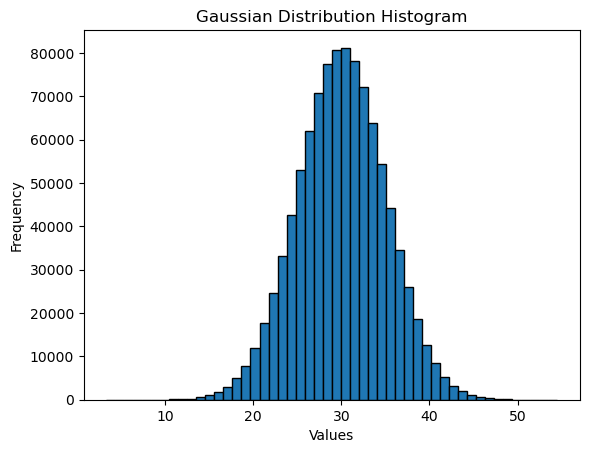

In [3]:
# Set the parameters for the Gaussian distribution
mean = 30
std_dev = 5


# Set the size of the distribution
size = 1000000


# Generate the Gaussian distribution
distribution = [random.gauss(mean, std_dev) for _ in range(size)]


# Plot the histogram
plt.hist(distribution, bins=50, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Gaussian Distribution Histogram')
plt.show()

## Drawing a Sample from the Population Distribution and Displaying its CDF Curve

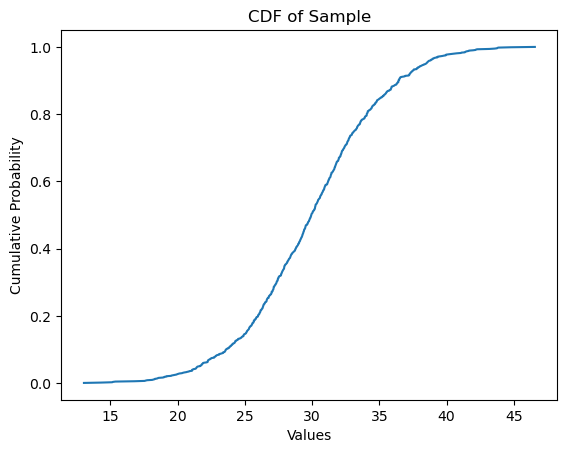

In [4]:
# Set the size of the sample
sample_size = 1000


# Draw a sample from the population
sample = random.sample(distribution, sample_size)


# Compute the CDF of the sample
sorted_sample = np.sort(sample)
cdf = np.arange(1, len(sorted_sample) + 1) / float(len(sorted_sample))


# Plot the CDF of the sample
plt.plot(sorted_sample, cdf)
plt.xlabel('Values')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Sample')
plt.show()

## CDF Curves of Multiple Samples Drawn from the Same Population  

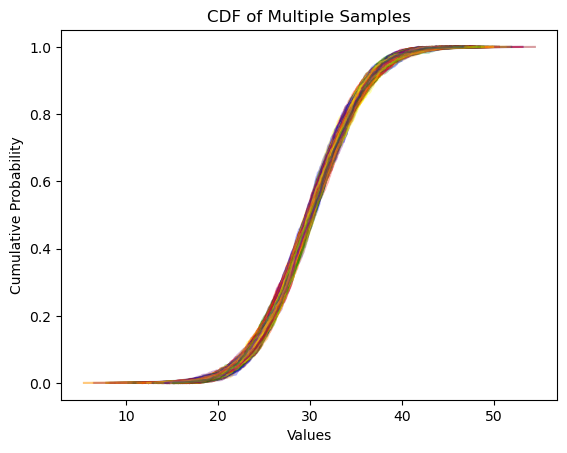

In [6]:
# Set the size of the sample
sample_size = 1000


# Set the number of repetitions
num_repetitions = 1000


# Plot each sample's CDF with a unique color
for _ in range(num_repetitions):
    # Draw a sample from the population
    sample = random.sample(distribution, sample_size)


    # Compute the CDF of the sample
    sorted_sample = np.sort(sample)
    cdf = np.arange(1, len(sorted_sample) + 1) / float(len(sorted_sample))


    # Generate a random color for each CDF
    color = random.choice(['red', 'blue', 'green', 'orange', 'purple', 'yellow'])


    # Plot the CDF of the sample with the assigned color
    plt.plot(sorted_sample, cdf, color=color, alpha=0.3)


plt.xlabel('Values')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Multiple Samples')
plt.show()

## CDF Curves of Two Samples Drawn from the Same Population

K-S statistic: 0.04817486644510355


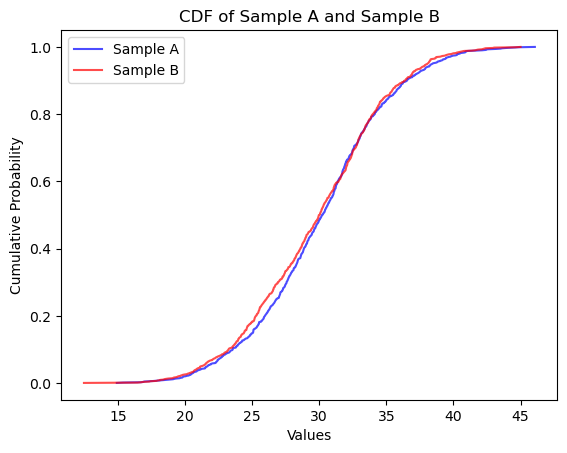

In [7]:
# Set the size of the sample
sample_size = 1000


# Draw two samples from the population
sample_a = random.sample(distribution, sample_size)
sample_b = random.sample(distribution, sample_size)


# Compute the CDF of sample_a
sorted_sample_a = np.sort(sample_a)
cdf_a = np.arange(1, len(sorted_sample_a) + 1) / float(len(sorted_sample_a))


# Compute the CDF of sample_b
sorted_sample_b = np.sort(sample_b)
cdf_b = np.arange(1, len(sorted_sample_b) + 1) / float(len(sorted_sample_b))


# Calculate the K-S statistic
combined_sorted_samples = np.sort(np.concatenate((sorted_sample_a, sorted_sample_b)))
cdf_a_interp = np.interp(combined_sorted_samples, sorted_sample_a, cdf_a)
cdf_b_interp = np.interp(combined_sorted_samples, sorted_sample_b, cdf_b)
ks_statistic = np.max(np.abs(cdf_a_interp - cdf_b_interp))
print("K-S statistic:", ks_statistic)


# Plot the CDF of sample_a
plt.plot(sorted_sample_a, cdf_a, label='Sample A', color='blue', alpha=0.7)


# Plot the CDF of sample_b
plt.plot(sorted_sample_b, cdf_b, label='Sample B', color='red', alpha=0.7)


plt.xlabel('Values')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Sample A and Sample B')
plt.legend()
plt.show()

## Simulating Multiple K-S Tests and Plotting the Distribution of K-S Statistic


Summary:
Proportion of tests with p-value <= 0.05: 0.0531
Proportion of tests where K-S statistic exceeds critical value: 0.0531


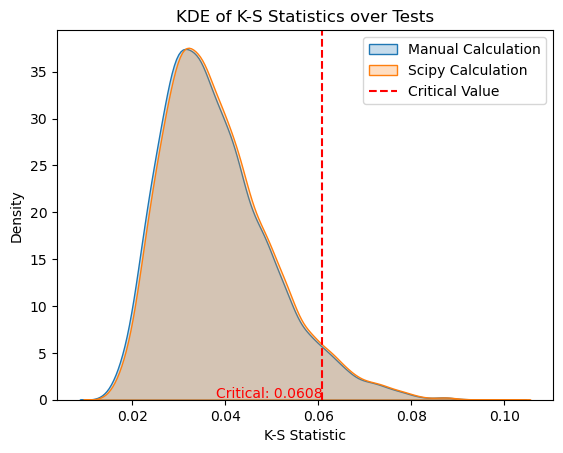

In [10]:

# Set the sample size
sample_size = 1000

# Set the number of tests
tests = 10000

# Create a list to store the K-S statistics
ks_stats_manual = []

# Create a list to store the K-S statistics calculated by scipy
ks_stats_scipy = []

# Counter to keep track of tests with p-value <= 0.05
pvalue_counter = 0

# Perform KS two-sample test with critical values
def ks_test(sample_a, sample_b):
    ks_stat_sp, p_value = ks_2samp(sample_a, sample_b, method="exact")
    n1, n2 = len(sample_a), len(sample_b)
    critical = 1.36 * np.sqrt((n1 + n2) / (n1 * n2))
    return ks_stat_sp, p_value, critical

for i in range(tests):
    # Draw two samples from the population
    sample_a = random.sample(distribution, sample_size)
    sample_b = random.sample(distribution, sample_size)

    # Compute the CDF of sample_a
    sorted_a = np.sort(sample_a)
    cdf_a = np.arange(1, len(sorted_a) + 1) / float(len(sorted_a))

    # Compute the CDF of sample_b
    sorted_b = np.sort(sample_b)
    cdf_b = np.arange(1, len(sorted_b) + 1) / float(len(sorted_b))

    # Calculate the K-S statistic
    combined_sorted_samples = np.sort(np.concatenate((sorted_a, sorted_b)))
    cdf_a_interp = np.interp(combined_sorted_samples, sorted_a, cdf_a)
    cdf_b_interp = np.interp(combined_sorted_samples, sorted_b, cdf_b)
    ks_stat_manual = np.max(np.abs(cdf_a_interp - cdf_b_interp))

    # Store the K-S statistic
    ks_stats_manual.append(ks_stat_manual)

    # Calculate and store the K-S statistic using scipy
    ks_stat_sp, p_value, critical = ks_test(sample_a, sample_b)
    ks_stats_scipy.append(ks_stat_sp)

    # Determine if line should be highlighted in green
    if p_value <= 0.05:
        pvalue_counter += 1

# Calculate the proportion of tests with significant p_value
p_significant = pvalue_counter / tests

# Print summary
significant_prop = sum(ks > critical for ks in ks_stats_scipy) / tests
print("\nSummary:")
print(f"Proportion of tests with p-value <= 0.05: {p_significant}")
print(f"Proportion of tests where K-S statistic exceeds critical value: {significant_prop}")

# Plot the KDE of K-S statistics
sns.kdeplot(ks_stats_manual, fill=True, label='Manual Calculation')
sns.kdeplot(ks_stats_scipy, fill=True, label='Scipy Calculation')
plt.xlabel('K-S Statistic')
plt.ylabel('Density')
plt.title('KDE of K-S Statistics over Tests')

# Add vertical line at the critical value
plt.axvline(critical, color='red', linestyle='--', label='Critical Value')

# Add text for the critical value
plt.text(critical, 0.2, f'Critical: {critical:.4f}', color='red', ha='right')

plt.legend()
plt.show()